## E534: Big Data Analytics Project

### Analyzing Everyday Challenges of People with Visual Impairments

Visually Impaired people face a vareity of problems in their daily lives. New technologies are helping people with visual impairments with varieties of their issues including object detction, reading text, household activities. The problems of people with visual impairments have been studied extensively. However, most of the works have been qualitative. Big data analytics and tools gave us a good opportunity to understand the problems of people with visual impairments quantitatively. Visually impaired people uses crowd based apps and ask crowd workers to help with their challenges. USing camera apps visually impaired users send photos and ask questions and crowdworkers help them by answering the question. From the asked questions and uploaded photos it is possible to understand the challenges of people with visual impairments. In this project, we explored the challenges of people with visual impairments based on their uploaded photos and questions. 

#### Data Description

The data is collected from [VizWiz](www.vizwiz.org), an iPhone app which helps the visually impaired people to answer their questions in nearly run time. There are more than 100,000 questions asked in VizWiz, however, due to privacy issues only 33543 of them were made public. The authors made the questions anonymized. Currently, the data is not available to download. Since I have the data, I want to use the data for my class project. However, I would request the instructor and the AI's to not share the data with anyone. I uploaded the data in my server and I will delete it after the grading of this project.

#### Data Preprocessing

In total, there are 33,543 data. First, we load the JSON file in a variable and check the number of responses. There are four columns in the data table: image source path, question asked, and responses. For each question, there can be upto multiple responses, some from IQ engines and some from web workers. VizWiz try to give an automated answer and sometimes if it's unable to find answers then it sends it to crowdworkers. 

In [165]:
import json
import pandas as pd
import os, os.path

# Data can be downloaded from this link: http://homes.soic.indiana.edu/touahmed/train.json
# Image data can be found in Google Drive Folder named hid237 
# Since the file is small, I also added that in Github
data = json.load(open('train.json'))

dataframe=pd.DataFrame.from_dict(data)
dataframe=dataframe.drop("private",1)
dataframe.head(10)

,image,question,responses
0,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRip3YQBDA.jpg,What type of pills are in this bottle?,"[{u'text': u'battle', u'source': u'web worker'..."
1,ag12aXp3aXotc29jaWFscg0LEgVRdWVyeRjl_kcM.jpg,What is this?,"[{u'text': u'20', u'source': u'web worker'}, {..."
2,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRjz_4YBDA.jpg,What is this?,"[{u'text': u'a packet', u'source': u'web worke..."
3,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRjz9bIBDA.jpg,What is this?,[{u'text': u'Smart Ones Personal Lasagna with ...
4,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRjxuY0BDA.jpg,What color is the table?,[{u'text': u'The screen is completely white. T...
5,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRiC5ZQDDA.jpg,What is this?,"[{u'text': u'A cell phone', u'source': u'web w..."
6,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRj726ICDA.jpg,"Oh, what does that say?","[{u'text': u'post cover address', u'source': u..."
7,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRi--f4BDA.jpg,Could you tell the contents of this package pl...,"[{u'text': u'card', u'source': u'web worker'},..."
8,ag12aXp3aXotc29jaWFscg0LEgVRdWVyeRid6ycM.jpg,What is the table number on this banquette tic...,"[{u'text': u'Federation of the Blind', u'sourc..."
9,ag12aXp3aXotc29jaWFscg4LEgVRdWVyeRiD7IEBDA.jpg,What is this?,"[{u'text': u'bl', u'source': u'web worker'}, {..."


Since we have two types of data, we first need to check if the number of questions matches with the number of image files. In this dataset, both the number matches. 

In [166]:
print len(dataframe)

### Image path: Change the path according to your image 0.


path='/Users/tousifeshan/Desktop/train/'
images=[]
for name in os.listdir(path):
    images.append(name)
print len(images)


33543
33543


The following function is helpful for drawing bubble charts, which I am going to frequently use later. 

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


# Took help from here: https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors
def bubble_chart(data_list):

    n=len(data_list)
    words = [" ".join(dt[0]) for dt in data_list]
    freq = [dt[1] for dt in data_list]
    x=np.random.choice(range(30,n*4-30), n, replace=False)
    y=np.random.choice(range(30,n*4-30), n, replace=False)
    colors=cm.rainbow(np.random.rand(n*5))
    x[0]=n
    y[0]=0
    
    x[1]=0
    y[1]=n
    
    x[2]=10
    y[2]=3*n
    
    x[3]=2*n
    y[3]=n/2
    
    
    plt.scatter(x,y,s=freq,color=colors,edgecolors="face",alpha=0.7)
    for i in range(n):
        plt.annotate(words[i],xy=(x[i],y[i]))
    axes = plt.gca()
    axes.set_xlim([-30,n*3+30])
    axes.set_ylim([-30,n*3+30])
    plt.xticks([])
    plt.yticks([])
    plt.rcParams["figure.figsize"] = (15,10)
    

    plt.show()

#### Challenges of People with VIsual Impairments

Clearly, the questions asked by people with visual impairments explains some of their challenges in their daily lives. Whenever they are facing issues, they are asking question in VizWiz. Therefore, the questions asked could give us some challenges. 

To understand the challenges, we first analyzed the questions. There are around 4500 unique words in the questions. The following analysis shows the most frequent words. Since the most frequently character is '?', we removed all words whose length is less than 2. 


[(u'what', 22793), (u'this', 20760), (u'the', 7476), ('NoQues', 5909), (u'you', 5539), (u'can', 3558), (u'color', 2783), (u'tell', 2439), (u'please', 2397), (u'kind', 2025), (u'does', 2017), (u'thank', 1927), (u'are', 1726), (u'and', 1604), (u'say', 1500), (u'that', 1377), (u'these', 987), (u'picture', 957), (u'box', 880), (u'screen', 859), (u'shirt', 817), (u'bottle', 786), (u'how', 785), (u'for', 732), (u'see', 718), (u'flavor', 673), (u'product', 610), (u'there', 601), (u'know', 594), (u'name', 578), (u'item', 522), (u'could', 482), (u'number', 480), (u'type', 468), (u'read', 440), (u'which', 425), (u'like', 403), (u'card', 402), (u'label', 396), (u'thanks', 389), (u'have', 386), (u'one', 359), (u'need', 351), (u'brand', 349), (u'coffee', 331), (u'just', 310), (u'date', 310), (u'much', 309), (u"n't", 291), (u'right', 289)]


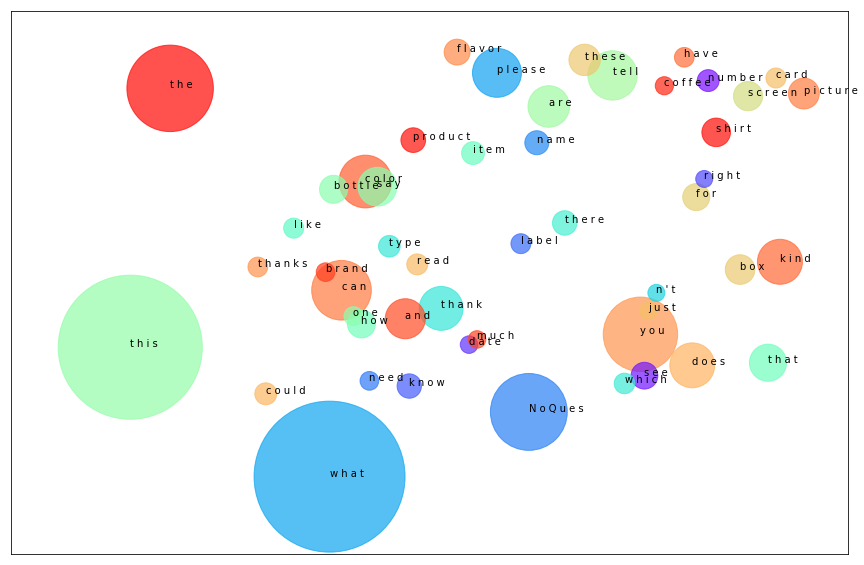

In [168]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

#nltk.download('popular')
## First Just check the questions
ques=dataframe["question"]
#ques.head(30)
all_ques=[]
for q in ques:
    words=nltk.word_tokenize(q.lower())
    words=[i for i in words if len(i) > 2]
    if len(words)>0:
        all_ques.extend(words)
    else:
        all_ques.extend(["NoQues"])
    
#words = nltk.word_tokenize(" ".join(ques.tolist()))
#all_ques= [i for i in all_ques if i not in stopwords.words("english") and len(i) > 2]
word_c=Counter(all_ques)
mc=word_c.most_common(50)
print mc
bubble_chart( mc)


Based on the previous analysis, we can see that the most frequently used word is 'what'. What appeared 22793 times which is approximately 70% of the time. That means the The second and third most frequent words are 'this' and 'the'. Although, 'what' is somewhat relevant for our analysis, this and 